# **Optimization - Homework 1**

![All_J.png](https://upload.wikimedia.org/wikipedia/commons/thumb/f/ff/Logo_uninorte_colombia.jpg/360px-Logo_uninorte_colombia.jpg)

**Prof. Elías D. Niño-Ruiz, Ph.D.**



*   Nombre del Estudiante: Carlos Jorge Pallares Urieles
*   Código del Estudiante: 200082362



Datasets to employ in this homework:

![546bcb8b90b87.image.png](https://upload.wikimedia.org/wikipedia/commons/thumb/7/79/NOAA_logo.svg/210px-NOAA_logo.svg.png)



1.   $u$ wind component (zonal wind component) - [download here](ftp://ftp2.psl.noaa.gov/Datasets/ncep.reanalysis2/pressure/uwnd.2020.nc)
2.   $v$ wind component (meridional wind component) - [download here](ftp://ftp2.psl.noaa.gov/Datasets/ncep.reanalysis2/pressure/vwnd.2020.nc)

Recall that, wind speed reads $w_s = \sqrt{u^2 + v^2}$. 



**Note.** *You can make use of all Jupyter Notebooks, from classes, as needed.*

**High-Order Derivatives for Wind Acceleration**

---


We employed a forward difference approximation for the estimation of wind acceleration in the globe for the NOAA data set, this is:
$$a_{i} = \frac{v_{i+1}-v_i}{h}\,,$$
where $v_i$ is the wind speed at time $i$, and $a_i$ denotes an estimation of the wind acceleration. Note that, by using this formula, we couldn't estimate the acceleration of the last time (because there is no $v_{i+1}$). However, we could do that by using a different formula, for instance, a backward difference approximation could make the work for the last time:
$$a_{i} = \frac{v_{i}-v_{i-1}}{h}\,,$$
in this homework you must:



---


**Exercise 1**

Propose two finite difference approximations for $f'(a)$ as follows:


1.   in the first one, only forward differences can be employed (i.e., $f(a+k\cdot h)$ for $k>0$), and
2.   in the last one, only backward differences can be employed (i.e., $f(a+k\cdot h)$ for $k<0$)

both of them, must be of order $\mathcal{O}(h^5)$. You can use the `sympy` module to make your life easier regarding computations. Show all equations! you can make use of the `Latex` and `display` commands to accomplish this.



**Answer.**

In [ ]:
from IPython.display import display, Latex
import sympy as sp
from sympy.parsing.sympy_parser import parse_expr

In [ ]:
def showL(s,eqn):
  display(Latex('('+str(eqn)+').'+sp.latex(s)+'=0'))

#CALCULO DE LA DIFRENCIA HACIA ADELANTE

In [ ]:
x = parse_expr('x');
a,h=parse_expr('a,h')
fx=parse_expr('f(x)')
w=(h*2)
eq1=fx.subs(x,a+h)-sp.series(fx,x=x,x0=a,n=6).subs(x,a+h) #Expansión por la derecha
eq2=fx.subs(x,a+w)-sp.series(fx,x=x,x0=a,n=6).subs(x,a+(w))
eq3=fx.subs(x,a+3*h)-sp.series(fx,x=x,x0=a,n=6).subs(x,a+(3*h))
eq4=fx.subs(x,a+4*h)-sp.series(fx,x=x,x0=a,n=6).subs(x,a+(4*h))
eq5=fx.subs(x,a+5*h)-sp.series(fx,x=x,x0=a,n=6).subs(x,a+(5*h))
eqx=fx.subs(x,a+6*h)-sp.series(fx,x=x,x0=a,n=6).subs(x,a+(h*6))


showL(eq1,1)
showL(eq2,2)
showL(eq3,3)
showL(eq4,4)
#showL(eq5,5)
showL(eqx,6)


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

In [ ]:

eq7=4*eq1-eq2 
showL(eq7.expand(),7)
showL(eq4-eq2*4,8)
eq8=eq4-eq2*4  
showL(eq7*8+eq8,9)
eq9=eq7*8+eq8 

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

In [ ]:
showL(2*eq9-eq8,10)
eq10=2*eq9-eq8 #Ecuación 8 será la 10

<IPython.core.display.Latex object>

In [ ]:
showL(4*eq3-eqx,11)
eq11=4*eq3-eqx #11 sigue 11

<IPython.core.display.Latex object>

In [ ]:
showL(12*eq1-3*eq2,12)
eq12=12*eq1-3*eq2 #12 sigue 12

<IPython.core.display.Latex object>

In [ ]:
showL(eq11/9 - eq12,13)
eq13=eq11/9 - eq12 #13 sigue 13

<IPython.core.display.Latex object>

In [ ]:
showL(eq9+eq13,14)

<IPython.core.display.Latex object>

# Anluación del termino cuadratico


In [ ]:
eq15=eq3-9*eq1
showL(eq15,15)

<IPython.core.display.Latex object>

In [ ]:
eq16=eq15*(16/9)-eq8
showL(eq16,16)
eq17=eq16*(7/5)+eq9
#showL(eq17,17)

<IPython.core.display.Latex object>

# 2.666=8/3
# 0.2666= -4/15



In [ ]:
eqFinal=(4/15)*(eq9+eq13)
showL(eqFinal,'EDF')
showL(eq17,17)

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>



*   Al restar la ecuación 17 a la ecuaion EDF eliminamos el termino cuadratico para despejar por completo nuestro valor de $f'(x)$.

*   El termino cuadratico en el resultado final tendrá un coeficiente demasiado cercano a cero y no cero, esto es resultado del redondeo decimal del IDE que estamos trabajando, pero si se verifica la ecuación 17 y la EDF vemos que el coeficiente del termino cuadratico es el mismo pero de signo opuesto.



In [ ]:
showL(eqFinal-eq17,18 )

<IPython.core.display.Latex object>

#LA DIFERENCIA HACIA ATRÁS SERÁ IGUAL A LA DIFERENCIA HACIA ADELANTE SOLO QUE CON SINGO OPUESTO EN LOS COEFICIENTES

Employ the previous formulas accordingly to estimate the acceleration at **all times** in the first numerical layer (the position 0, the one we choose in classes, this height corresponds to 10 hPa). Compute the mean of accelerations (in the globe) and plot that by using BaseMap (as we done, in classes). You may need to connect Google Drive with your Jupyter Notebook. Set $h=0.25$. Comment as needed.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

**Answer.**

In [ ]:
!apt-get install libgeos-3.5.0  #Visualización de datos geofraficos y geofisicos
!apt-get install libgeos-dev
!pip install https://github.com/matplotlib/basemap/archive/master.zip #Basemap permite hacer mapas del mundo

In [ ]:
pip install netcdf4 #Manejo de archivos tipo NETCDF para manejarlos como vectores y/o matrices 

In [ ]:
import pandas as pd
import numpy as np
from netCDF4 import Dataset
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
import seaborn as sns
import sys

#DE SER NECESARIO CAMBIAR LA UBICACIÓN DE LOS ARCHIVOS PARA ACCEDERLOS A TRAVES DE DRIVE

In [ ]:
u_wnd = Dataset('drive/My Drive/Python Files/uwnd.2020.nc','r')
v_wnd = Dataset('drive/My Drive/Python Files/vwnd.2020.nc','r')

In [ ]:
lon=u_wnd['lon'][:] #Obtenemos longitud para U
lat=v_wnd['lat'][:] #Obtenemos latitud para W

In [ ]:
u_0 = u_wnd['uwnd'] #Todos los instantes de tiempo,todos los niveles, latitud,longitud--se puede ver en uwnd(time, level, lat, lon)
v_0 = v_wnd['vwnd'] #Todos los instantes de tiempo,todos los niveles, latitud,longitud-se puede ver en vwnd(time, level, lat, lon)
u_0=u_0[:,0,:,:] #Todos los instantes de tiempo,nivel cero, latitud,longitud-se puede ver en uwnd(time, level, lat, lon)
v_0=v_0[:,0,:,:] #Todos los instantes de tiempo,nivel cero, latitud,longitud-se puede ver en vwnd(time, level, lat, lon)

In [ ]:
#np.shape(u_0)[1]
#np.shape(v_0)
#np.shape(u_0)[0]

In [ ]:
ws=np.sqrt(np.power(u_0,2)+np.power(v_0,2))
#plt.contourf(ws[0,:,:])
#np.array(ws[1,0,0])

In [ ]:
#def v_ltln(lt,ln):
 # t=np.shape(u_0)[0]
  #v_t=np.zeros(np.shape(u_0)[0])
  #for i in range(0,t):
   # v_t[i]=np.array(ws[i,lt,ln])
  #return v_t

In [ ]:
def fwd_diffStandar(f0h,f0,h):
  return ((f0h-f0)/h) #Formula, falta poner los coeficientes de los f

In [ ]:
def ac_ltlnStandar(lt,ln):
  
  ac_pos=np.zeros(np.shape(u_0)[0])
  t=np.shape(u_0)[0]
  v_t=np.zeros(np.shape(u_0)[0])

  for i in range(0,t):
    v_t[i]=np.array(ws[i,lt,ln])

  for i in range(0,np.shape(u_0)[0]-1): #Porque estamos tomando 5 posiciones adelante
    ac_pos[i]=fwd_diffStandar(v_t[i+1],v_t[i],0.25) #i y j son los parametros a+kh

  return ac_pos #Toca ver si es necesario estandarizar los datos para obtener una media concisa

In [ ]:
def fwd_diff(f0,f1,f2,f3,f4,f6,h):
  return (((-2.0*f0)+(4.26*f1)+(-4.0*f2)+(2.370*f3)+(-0.666*f4)+(0.0296*f6))/(0.888*h)) 

In [ ]:
def back_diff(f0,f1,f2,f3,f4,f6,h):
  return (((2.0*f0)+(-4.26*f1)+(4.0*f2)+(-2.370*f3)+(0.666*f4)+(-0.0296*f6))/(0.888*h)) 

In [ ]:
def ac_ltln(lt,ln):
  
  ac_pos=np.zeros(np.shape(u_0)[0])
  t=np.shape(u_0)[0]
  v_t=np.zeros(np.shape(u_0)[0])

  for i in range(0,t):
    v_t[i]=np.array(ws[i,lt,ln])

  for i in range(0,np.shape(u_0)[0]-6): #Porque estamos tomando 5 posiciones adelante
    ac_pos[i]=fwd_diff(v_t[i],v_t[i+1],v_t[i+2],v_t[i+3],v_t[i+4],v_t[i+6],0.25) #i y j son los parametros a+kh
  last=np.shape(u_0)[0]-1
  for j in range(0,6):
    ac_pos[last-j]=back_diff(v_t[last-(j)],v_t[last-(1+j)],v_t[last-(2+j)],v_t[last-(3+j)],v_t[last-(4+j)],v_t[last-(6+j)],0.25)
  return ac_pos 

In [ ]:
world_ac=np.zeros((np.shape(u_0)[1],np.shape(u_0)[2]))

In [ ]:
def finalR ():
  for i in range(0,np.shape(u_0)[1]):
    for j in range(0,np.shape(u_0)[2]):
      world_ac[i][j]=np.mean(ac_ltln(i,j))
  return world_ac

In [ ]:
lonM, latM =np.meshgrid(lon, lat)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: The following kwargs were not used by contour: 'aplha'
  


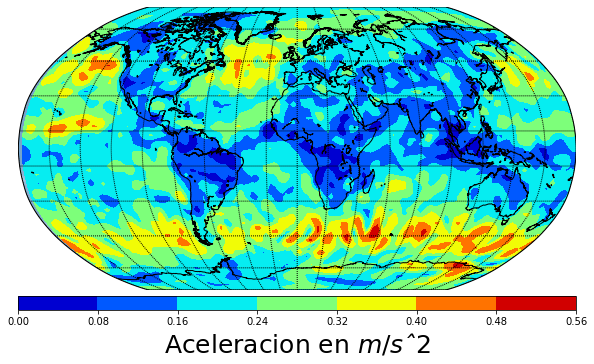

In [ ]:
#Usaremos Basemap ahora para crear un mapa mundi
fig=plt.figure(figsize=(10,8))
m=Basemap(resolution='l',projection='robin',lat_0=lat[0],lon_0=lon[0]);
m.shadedrelief(scale=0.5)
m.drawcoastlines(linewidth=1)
m.drawparallels(np.arange(-90,90,20))
m.drawmeridians(np.arange(0,357.5,20))
m.contourf(lonM,latM,np.abs(finalR()),latlon=True,cmap='jet',aplha=0.6)
cbar=m.colorbar(location='bottom')
cbar.set_label(label='Aceleracion en $m/sˆ2$',size=25)
plt.show()

In [ ]:
import seaborn as sns

(-100.0, 100.0)

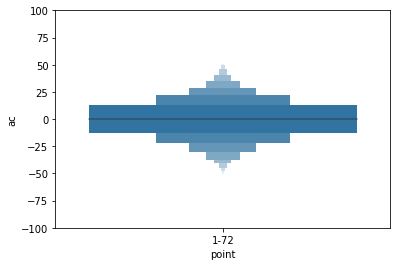

In [ ]:
long=1 #LONGITUD ESPECIFICA
lati=72 #LATITUD ESPECIFICA
vecac=ac_ltln(long,lati)
vx=np.full(np.shape(u_0)[0],str(long)+"-"+str(lati))
z=np.zeros(np.shape(u_0)[0])
for i in range(0,np.shape(u_0)[0]):
  z[i]=ws[i,long,lati]

data={'point':vx,'ac':(vecac),'v':z}
df=pd.DataFrame(data=data,columns=['point','ac','v'])
df.head()
sns.boxenplot(data=df,x='point',y='ac', showfliers=False)
plt.ylim(-100,100)
#df=pd.DataFrame(data=data,columns['t','ac'])

In [ ]:
df.head()

,point,ac,v
0,1-72,37.219983,3.584690
1,1-72,-33.210782,4.810408
2,1-72,32.424011,3.580492
3,1-72,-25.792631,5.727118
4,1-72,45.902905,6.937576


In [ ]:
df.tail()

,point,ac,v
847,1-72,1.700142,6.319810
848,1-72,-1.309223,7.045565
849,1-72,-2.697575,6.844706
850,1-72,-9.930239,5.059646
851,1-72,7.791166,4.295345


<function matplotlib.pyplot.colorbar>

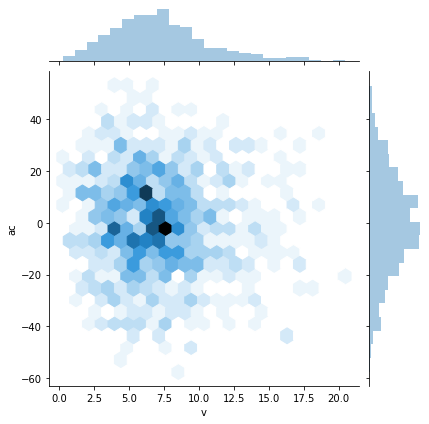

In [ ]:
sns.jointplot(data=df,x='v',y='ac',kind='hex')
plt.colorbar

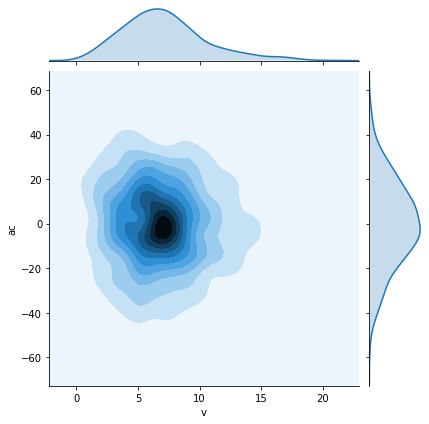

In [ ]:
sns.jointplot(data=df,x='v',y='ac',kind='kde')


# Conclusiones:
A diferencia de la diferencia finita implementada en clase de orden 2 para una primera derivada, en este caso con orden 5 para la misma derivada nos damos cuenta que la barra de colores referente a la magnitud acelaración tiene mayor rango, lo cual es explicado al tener una mayor cantidad de terminos asociados al calculo de la aceleración en un instante ***t*** para un punto(LAT,LON) en especifico .

Los siguientes gráficos nos muestrán de mejor forma lo expuesto para un punto (1,72) en el globo:

* **Derivada finita con error de orden cuadrado**
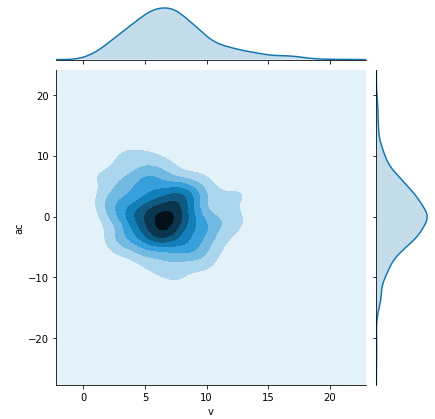

* **Derivada finita con error de orden quinto**
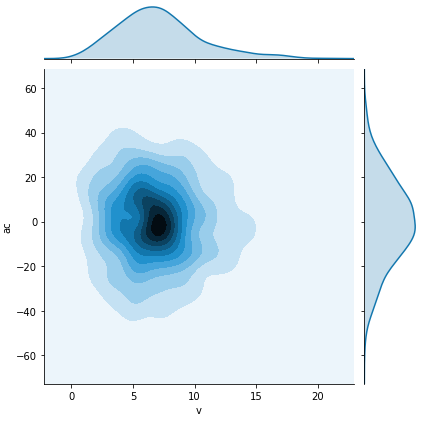

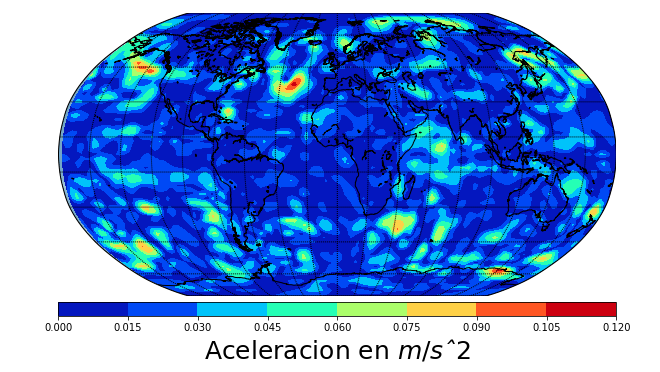

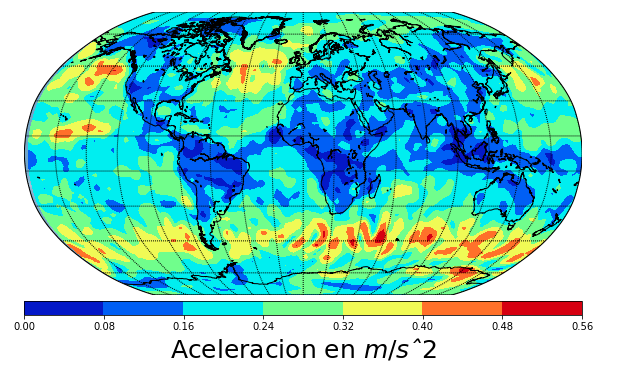




En la primera figura referente a los graficos de eje XY, la dispersión es menor y los valores de la aceleración están mas proximos a ser cero, a diferencia de la segunda figura donde hay una mayor dispersión y la gráfica se ve mas achatada, por lo que no la mayoría de nuestros valores de aceleración están cerca de cero y entonces obtenemos rangos de aceleración mayores para nuestra barra de color que acompaña el gráfico del globo.

Al tener mas puntos que evaluar respecto a un punto de expansión puedo explicar mejor su comportamiento, o sea ser mas preciso en como cambia.

Para el primer globo terraqueo inmplementamos una diferencia finita de orden $2$ que solo tenía un paso hacia adelante por lo que el rango de los valores para aceleración va de $0$ a $0.12$, a diferencia del segundo globo terraqueo que implementa una diferencia finita de orden $5$ con $5$ terminos que va de $0$ hasta $0.56$ con 7 categorías en total, donde las dos primeras categorias corresponden al intervalo completo que se obtiene en el primer globo terraqueo, o sea que obtuvimos una mejor clasificación de los puntos(LAT,LON)

#OBSERVACIÓN:

El código utilizado para esta tarea fue basado en el material del curso de **OPTIMIZACIÓN** dictado por el profesor **Elias Niño** en el periodo **2020-03**.

**Recuerde:** En este curso no se tolerará el plagio. Sin excepción, en caso de presentarse esta situación, a los estudiantes involucrados se les iniciará proceso de investigación, y se actuará en conformidad con el Reglamento de Estudiantes de la Universidad del Norte. El plagio incluye: usar contenidos sin la debida referencia, de manera literal o con mínimos cambios que no alteren el espíritu del texto/código; adquirir con o sin intención, trabajos de terceros y presentarlos parcial o totalmente como propios; presentar trabajos en grupo donde alguno de los integrantes no trabajó o donde no hubo trabajo demostrable en equipo; entre otras situaciones definidas en el manual de fraude académico de la Universidad del Norte:

(https://guayacan.uninorte.edu.co/normatividad_interna/upload/File/Guia_Prevencion_Fraude%20estudiantes(5).pdf ).